In [1]:
import numpy as np
import pandas as pd
import src.utils as utils

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Configuration File

In [2]:
config_data = utils.config_load()
config_data

{'raw_dataset_path': 'E:\\PACMAN\\Credit Score\\Data\\Raw\\data.csv',
 'data_set_path': 'E:\\PACMAN\\Credit Score\\Data\\Output\\data.pkl',
 'input_set_path': 'E:\\PACMAN\\Credit Score\\Data\\Output\\input.pkl',
 'output_set_path': 'E:\\PACMAN\\Credit Score\\Data\\Output\\output.pkl',
 'input_columns_path': 'E:\\PACMAN\\Credit Score\\Data\\Output\\input_columns.pkl',
 'train_set_path': ['E:\\PACMAN\\Credit Score\\Data\\Output\\X_train.pkl',
  'E:\\PACMAN\\Credit Score\\Data\\Output\\y_train.pkl'],
 'valid_set_path': ['E:\\PACMAN\\Credit Score\\Data\\Output\\X_valid.pkl',
  'E:\\PACMAN\\Credit Score\\Data\\Output\\y_valid.pkl'],
 'test_set_path': ['E:\\PACMAN\\Credit Score\\Data\\Output\\X_test.pkl',
  'E:\\PACMAN\\Credit Score\\Data\\Output\\y_test.pkl'],
 'index_column': 'Unnamed: 0',
 'output_column': 'SeriousDlqin2yrs',
 'seed': 42,
 'test_size': 0.2}

Load Data

In [3]:
X_train = utils.pickle_load(config_data['train_set_path'][0])
y_train = utils.pickle_load(config_data['train_set_path'][1])

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (96000, 10)
y_train shape: (96000,)


In [4]:
data = pd.concat((X_train, y_train), axis=1)
data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
145776,0.085396,60,0,6.053892,500.0,10,0,2,0,0.0,0
61313,0.007089,48,0,0.284185,9623.0,16,0,2,0,0.0,0
128371,0.047499,62,0,6265.000000,NaN,19,0,4,0,0.0,0
48243,0.050541,33,0,4821.000000,NaN,9,0,3,0,0.0,0
54026,0.153372,50,0,0.375656,4000.0,9,0,1,0,0.0,0


EDA

check data type

In [5]:
# Check datatype
data.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
SeriousDlqin2yrs                          int64
dtype: object

Summary
Tipe data sudah sesuai dengan definisi data

In [6]:
# Check missing value
data.isna().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           18946
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2496
SeriousDlqin2yrs                            0
dtype: int64

In [7]:
data[data['NumberOfDependents'].isna()]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
59728,0.014758,69,0,21.0,NaN,5,0,0,0,NaN,0
135372,0.000000,79,0,0.0,NaN,4,0,0,0,NaN,0
61575,0.032305,46,0,1510.0,NaN,6,0,2,0,NaN,0
124858,1.000000,24,0,66.0,NaN,0,0,0,0,NaN,0
17288,0.243781,51,2,661.0,NaN,2,0,1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
142722,1.000000,23,0,4.0,NaN,1,0,0,0,NaN,0
75792,0.912596,49,0,744.0,NaN,7,0,1,0,NaN,0
14089,0.013069,29,0,11.0,NaN,3,0,0,0,NaN,0
84180,0.199312,61,0,3276.0,NaN,3,0,1,0,NaN,0


In [9]:
data[data['MonthlyIncome'].isna()]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
128371,0.047499,62,0,6265.0,NaN,19,0,4,0,0.0,0
48243,0.050541,33,0,4821.0,NaN,9,0,3,0,0.0,0
36943,0.044536,46,0,4207.0,NaN,12,0,4,0,0.0,0
59728,0.014758,69,0,21.0,NaN,5,0,0,0,NaN,0
6378,0.290095,59,0,4032.0,NaN,6,0,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
146316,0.017290,46,0,3203.0,NaN,6,0,1,0,0.0,0
55818,0.067284,64,0,1044.0,NaN,3,0,1,0,NaN,0
129006,0.009658,83,0,21.0,NaN,14,0,0,0,0.0,0
87940,0.208658,52,0,1933.0,NaN,8,0,1,0,0.0,0


Summary

MonthlyIncome and NumberOfDependents punya missing value

Visualize distribution

In [10]:
data.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

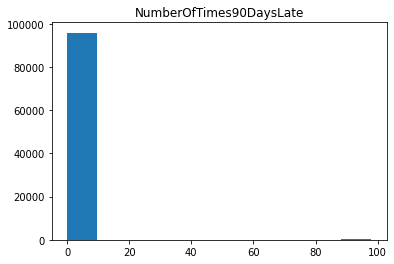

In [11]:
col = 'NumberOfTimes90DaysLate'

plt.hist(data[col])
plt.title(col)
plt.show()

In [12]:
data[data[col]==98]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
42920,1.0,49,98,0.0,3000.0,0,98,0,98,0.0,0
126270,1.0,27,98,45.0,NaN,0,98,0,98,0.0,1
134594,1.0,33,98,0.0,4100.0,0,98,0,98,1.0,1
72671,1.0,23,98,0.0,NaN,0,98,0,98,0.0,1
40716,1.0,21,98,0.0,NaN,0,98,0,98,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
141072,1.0,24,98,0.0,750.0,0,98,0,98,0.0,0
30081,1.0,22,98,0.0,NaN,0,98,0,98,NaN,0
82424,1.0,22,98,0.0,NaN,0,98,0,98,NaN,1
98032,1.0,25,98,54.0,NaN,0,98,0,98,0.0,1


In [13]:
data[data[col]==96]['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

96    2
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

Kesimpulan

pada kolom

- NumberOfTime30-59DaysPastDueNotWorse,
- NumberOfTime60-89DaysPastDueNotWorse, dan
- NumberOfTimes90DaysLate
data yang nilainya 96 & 98 di drop

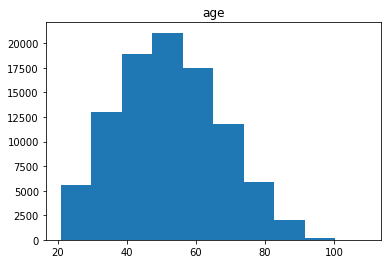

In [14]:
col = 'age'

plt.hist(data[col])
plt.title(col)
plt.show()

Kesimpulan

gak ada masalah sama usia